In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope


---
# 🔹 Як знайти аномалії за допомогою EllipticEnvelope?
---

Навчити модель на даних – EllipticEnvelope будує еліптичну область, яка охоплює основну масу даних.
Отримати передбачення – метод predict() поверне:
1 – якщо точка вважається нормальною,
-1 – якщо точка є аномалією.

**🔹 Параметри, які можуть вплинути на точність:**
contamination – Частка аномальних точок у вибірці (за замовчуванням 0.1).
assume_centered=True – Якщо True, алгоритм не центрує дані (добре для вже центрованих вибірок).
support_fraction – Визначає частку вибірки, яку використовують для оцінки ковариації (за замовчуванням автоматично вибирається).
**🔹 Переваги:**
✅ Добре працює для нормально розподілених даних.
✅ Не потребує міток (це unsupervised метод).

**🔹 Недоліки:**
❌ Чутливий до ненормальних розподілів.
❌ Параметр contamination потрібно підбирати вручну.

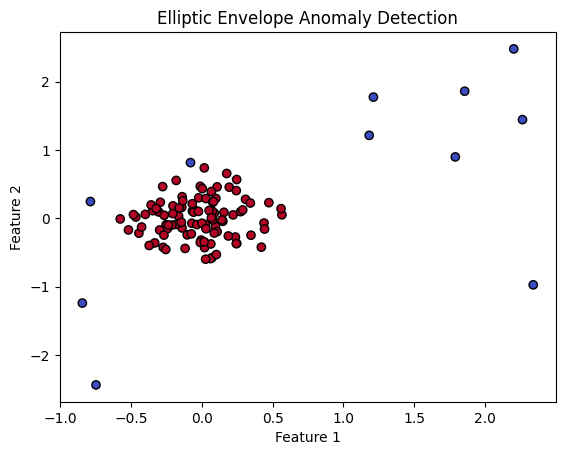

In [6]:

# Генеруємо нормальні дані
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)  # 100 точок у 2D
X = np.r_[X, rng.uniform(low=-3, high=3, size=(10, 2))]  # Додаємо 10 аномалій

# Створюємо та навчаємо модель
envelope = EllipticEnvelope(contamination=0.1)  # Очікуємо 10% аномалій
envelope.fit(X)

# Передбачаємо аномалії
y_pred = envelope.predict(X)

# Візуалізація
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Elliptic Envelope Anomaly Detection")
plt.show()


---
# Local Outlier Factor (LOF)
---

**Основна ідея:** визначає аномалію, порівнюючи щільність точки з її сусідами. Якщо точка знаходиться в області з низькою щільністю порівняно з сусідніми точками, вона вважається аномальною.

**Як працює LOF?**
Обчислює відстань від кожної точки до її найближчих k сусідів (k-nearest neighbors).
Визначає локальну щільність точки – чим ближче точки, тим вища щільність.
Обчислює локальний фактор викиду (LOF) – якщо точка має значно нижчу щільність, ніж її сусіди, вона є аномалією.


**Переваги LOF**
✅ Виявляє локальні аномалії, навіть якщо розподіл різний у різних областях.
✅ Добре працює з кластерами.

**Недоліки LOF**
❌ Потребує підбору n_neighbors.
❌ Повільний на великих даних (часова складність O(n²)).

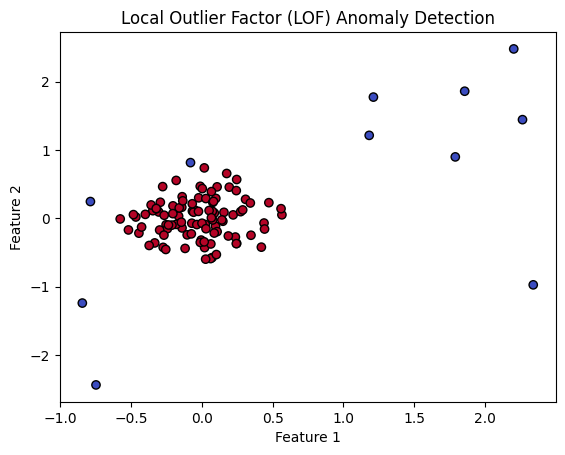

In [7]:
from sklearn.neighbors import LocalOutlierFactor

# Створюємо та навчаємо модель LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)

# Візуалізація
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.show()


---
# Isolation Forest (IF)
---
**Основна ідея:** викиди легше ізолювати, ніж нормальні точки. Алгоритм випадково розбиває простір на області та вимірює, наскільки швидко точку можна ізолювати.

**Як працює Isolation Forest?**
Створює випадкові розбиття простору за допомогою random splits.
Будує багато дерев ізоляції (Isolation Trees).
Для кожної точки рахує середню глибину ізоляції – чим швидше точка ізолюється, тим вища ймовірність, що це аномалія.

**Переваги Isolation Forest**
✅ Добре працює з великими вибірками (лінійна складність O(n log n)).
✅ Не потребує обчислення відстаней.
✅ Підходить для високорозмірних даних.

**Недоліки Isolation Forest**
❌ Погано працює, якщо дані не мають явних аномалій.
❌ Не завжди дає стабільні результати (залежить від random_state).

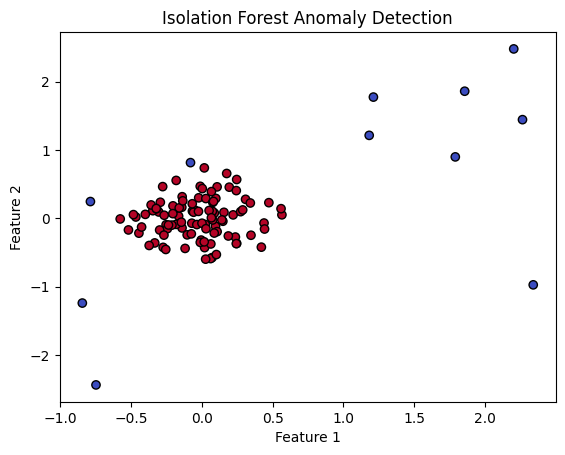

In [8]:
from sklearn.ensemble import IsolationForest

# Створюємо та навчаємо модель Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred = iso_forest.fit_predict(X)

# Візуалізація
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="coolwarm", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Isolation Forest Anomaly Detection")
plt.show()


---
# 🚀 Висновок
---

Якщо у вас невеликий набір даних із локальними кластерами → LOF.
Якщо у вас великий набір даних або висока розмірність → Isolation Forest.
Якщо дані мають нормальний розподіл → EllipticEnvelope.
Якщо не знаєте, який метод обрати – спробуйте кілька й порівняйте результати! 🔥